# Trans-Atlantic and Intra-American Voyages of Enslaved Africans

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sns
import folium
from folium import plugins
import plotly.graph_objects as go
import plotly.express as px

## Data Import and Inspection

In [5]:
trans_atl = pd.read_csv('./trans_atlantic_data.csv')
trans_atl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36246 entries, 0 to 36245
Data columns (total 9 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Year of arrival at port of disembarkation                                          36246 non-null  int64  
 1   Voyage ID                                                                          36246 non-null  int64  
 2   Vessel name                                                                        34634 non-null  object 
 3   Voyage itinerary imputed port where began (ptdepimp) place                         31739 non-null  object 
 4   Voyage itinerary imputed principal place of slave purchase (mjbyptimp)             34012 non-null  object 
 5   Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place  32050 non-null  obje

In [6]:
trans_atl.columns

Index(['Year of arrival at port of disembarkation', 'Voyage ID', 'Vessel name',
       'Voyage itinerary imputed port where began (ptdepimp) place',
       'Voyage itinerary imputed principal place of slave purchase (mjbyptimp) ',
       'Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place',
       'VOYAGEID2', 'Captives arrived at 1st port', 'Captain's name'],
      dtype='object')

In [7]:
trans_atl.rename(columns={'Year of arrival at port of disembarkation': 'end_year',
                          'Voyage ID': 'voyage_id',
                          'Vessel name': 'vessel_name',
                          'Voyage itinerary imputed port where began (ptdepimp) place': 'start_port',
                          'Voyage itinerary imputed principal place of slave purchase (mjbyptimp) ': 'purchase_port',
                          'Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place': 'end_port',
                          'VOYAGEID2': 'voyage_id2',
                          'Captives arrived at 1st port': 'ancestor_count',
                          'Captain\'s name': 'captain'},
                inplace=True)
trans_atl.head()

end_year  voyage_id vessel_name start_port  \
0      1787      82035        John  Liverpool   
1      1786      82036        John  Liverpool   
2      1799      82037        John  Liverpool   
3      1801      82038        John  Liverpool   
4      1802      82039        John  Liverpool   

                     purchase_port                     end_port voyage_id2  \
0                            Bonny  Dominica, place unspecified        NaN   
1                            Bonny  Dominica, place unspecified        NaN   
2                      Congo River                     Demerara        NaN   
3  Windward Coast (Nunez - Assini)                     Demerara        NaN   
4                        Gallinhas                     Demerara        NaN   

   ancestor_count                                      captain  
0           314.0  Oates, Richard<br/> Woodville, William (Jr)  
1           270.0       Stevenson, William<br/> Joynson, Moses  
2           400.0                              Hensley, Samuel  
3           243.0       Mentor, Edward<br/> Fotheringham, John  
4           247.0                                  Roach, John

In [8]:
trans_atl.columns

Index(['end_year', 'voyage_id', 'vessel_name', 'start_port', 'purchase_port',
       'end_port', 'voyage_id2', 'ancestor_count', 'captain'],
      dtype='object')

In [9]:
intra_amer = pd.read_csv('./intra_american_data.csv')
intra_amer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31789 entries, 0 to 31788
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Year of arrival at port of disembarkation                                          31789 non-null  int64  
 1   Voyage ID                                                                          31789 non-null  int64  
 2   Vessel name                                                                        30855 non-null  object 
 3   Voyage itinerary imputed principal place of slave purchase (mjbyptimp)             31112 non-null  object 
 4   Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place  30836 non-null  object 
 5   VOYAGEID2                                                                          64 non-null     obje

In [10]:
intra_amer.head()

Year of arrival at port of disembarkation  Voyage ID Vessel name  \
0                                       1717     100002         NaN   
1                                       1717     100003         NaN   
2                                       1717     100004         NaN   
3                                       1737     100008      Ranger   
4                                       1700     100009  Resolution   

  Voyage itinerary imputed principal place of slave purchase (mjbyptimp)   \
0                                          Cartagena                        
1                         Jamaica, place unspecified                        
2                                          Cartagena                        
3                                      St. Eustatius                        
4                        Barbados, place unspecified                        

  Voyage itinerary imputed principal port of slave disembarkation (mjslptimp) place  \
0                                   Santiago de Cuba                                  
1                                   Santiago de Cuba                                  
2                                   Santiago de Cuba                                  
3                        Barbados, place unspecified                                  
4                                   British Leewards                                  

  VOYAGEID2  Captives arrived at 1st port   Captain's name  
0       NaN                          40.0              NaN  
1       NaN                          16.0   Cumberlege [?]  
2       NaN                          30.0              NaN  
3       NaN                           8.0      Smith, Dan.  
4       NaN                           NaN  Calvert, Samuel

## Exploratory Data Analysis

In [12]:
trans_atl.describe()

end_year      voyage_id  ancestor_count
count  36246.000000   36246.000000    18417.000000
mean    1764.463693   42776.506014      276.003855
std       59.225361   72582.295199      158.771731
min     1514.000000       1.000000        0.000000
25%     1732.000000   16173.250000      158.000000
50%     1773.000000   32473.500000      254.000000
75%     1806.000000   50297.750000      370.000000
max     1866.000000  900237.000000     1700.000000

In [13]:
trans_atl['end_port'].unique()

array(['Dominica, place unspecified', 'Demerara', 'Havana', 'Charleston',
       'Suriname, place unspecified', 'Kingston',
       'Grenada, place unspecified', nan,
       'British Caribbean, colony unspecified',
       'Jamaica, place unspecified', 'Barbados, place unspecified',
       'St. Kitts, port unspecified', 'Martinique, place unspecified',
       'Tortola, port unspecified', 'St. Thomas',
       'Trinidad, port unspecified', 'Montego Bay',
       'St. Vincent, port unspecified', 'Basse-Terre',
       'Saint John (Antigua)', 'St. Lucia, port unspecified',
       'Caribbean (colony unspecified)', 'Bahamas, port unspecified',
       'Morant Bay', 'St. Barthélemy, port unspecified', 'Port-au-Prince',
       'Savannah', 'Cap Français', 'Hispaniola, unspecified',
       'Black River', 'St. Eustatius', 'Guayana, Venezuela',
       'Antigua, place unspecified', 'Cayenne', 'Zion Hill',
       'St. Maarten', 'New Orleans',
       'French Caribbean, colony unspecified', 'British Leewar

In [14]:
trans_atl['purchase_port'].unique()

array(['Bonny', 'Congo River', 'Windward Coast (Nunez - Assini)',
       'Gallinhas', 'Africa, port unspecified', 'Sierra Leone estuary',
       'Cape Coast Castle', 'Gorée',
       'Bight of Biafra and Gulf of Guinea Islands, port unspecified',
       'Iles de Los', 'Gabon', 'Gold Coast, port unspecified',
       'Cameroons', 'Bance/Bunce Island', nan, 'Calabar', 'Bassa',
       'West Central Africa and St. Helena, port unspecified',
       'Lagos, Onim', 'Bight of Benin, place unspecified',
       'Cape Mount (Cape Grand Mount)', 'Whydah, Ouidah', 'Ambriz',
       'New Calabar', 'Accra', 'Malembo', 'Anomabu', 'Rio Pongo',
       'Cabinda', 'Sierra Leone, port unspecified',
       'Windward Coast, place unspecified',
       'Senegambia and offshore Atlantic, port unspecified', 'Gambia',
       'Cap Lopez', 'Porto Novo', 'Benin', 'Congo North', 'Bimbia',
       'Loango', 'Cape Mole', 'Badagry/Apa', 'Rio Nunez', 'Ambona',
       'Banana Islands', 'Little Junk', 'Cape Lahou', 'Popo',
   

In [15]:
captives_by_port = trans_atl.groupby('purchase_port')['ancestor_count'].sum().reset_index()
captives_by_port.head()

purchase_port  ancestor_count
0                     Accra         11253.0
1  Africa, port unspecified        753298.0
2                    Aghway           950.0
3                    Alampo           933.0
4                   Albreda           137.0

In [16]:
# scaling by port
port_weight = (captives_by_port['ancestor_count'] - captives_by_port['ancestor_count'].min()) / (captives_by_port['ancestor_count'].max() - captives_by_port['ancestor_count'].min()) * 1000 + 10

In [17]:
# counts by year
yearly_count = trans_atl.groupby('end_year')['ancestor_count'].sum().reset_index()
yearly_count

end_year  ancestor_count
0        1514             0.0
1        1516             0.0
2        1519             0.0
3        1520            44.0
4        1526           115.0
..        ...             ...
332      1862         11407.0
333      1863          6739.0
334      1864          3298.0
335      1865           795.0
336      1866           700.0

[337 rows x 2 columns]

In [18]:
# scaling
year_weight = pd.DataFrame((yearly_count['ancestor_count'] - captives_by_port['ancestor_count'].min()) / (yearly_count['ancestor_count'].max() - yearly_count['ancestor_count'].min()) * 1000)
year_weight.rename(columns={'ancestor_count': 'ancestors_weight'}, inplace=True)
year_weight

ancestors_weight
0            0.000000
1            0.000000
2            0.000000
3            0.553654
4            1.447051
..                ...
332        143.534830
333         84.797161
334         41.498893
335         10.003523
336          8.808134

[337 rows x 1 columns]

In [19]:
for x in range(100, 1100, 100):
    print((x + captives_by_port['ancestor_count'].min()) * (yearly_count['ancestor_count'].max() + yearly_count['ancestor_count'].min()) / 1000)

7947.2
15894.4
23841.6
31788.8
39736.0
47683.2
55630.4
63577.6
71524.8
79472.0


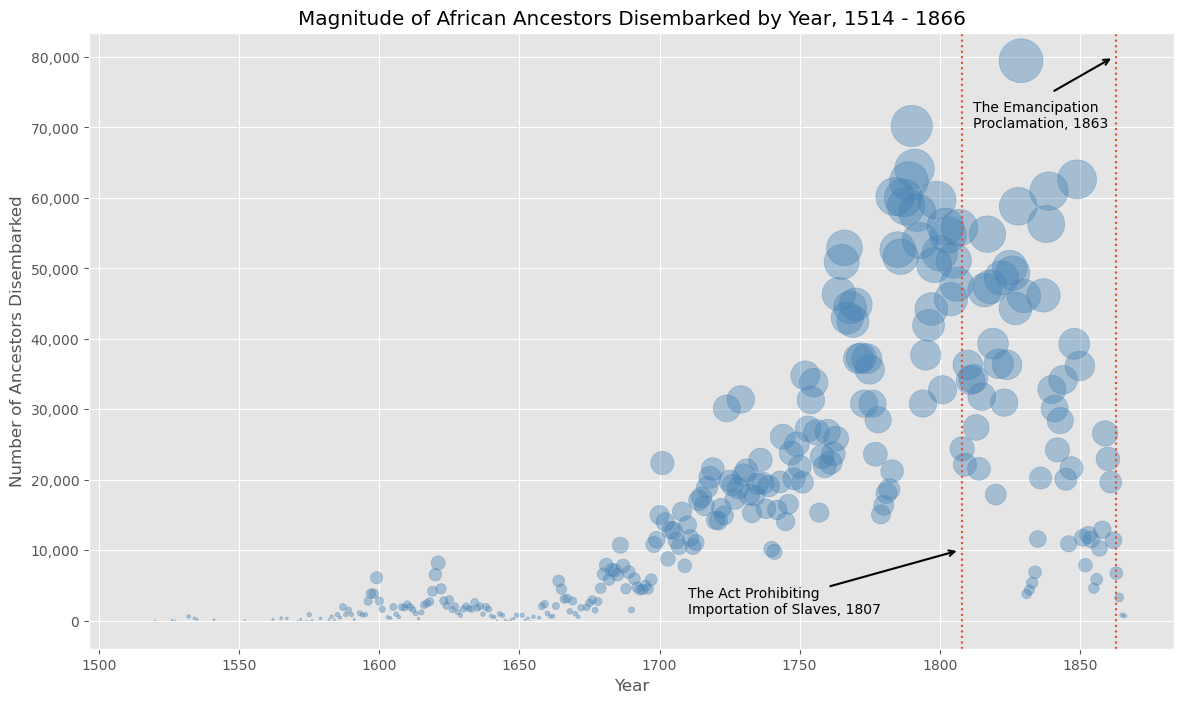

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))

scatter = ax.scatter(x=yearly_count['end_year'],
                     y=yearly_count['ancestor_count'],
                     s=year_weight,
                     alpha=0.4,
                     color='steelblue')

plt.axvline(1808, lw=1.5, ls=':')
plt.axvline(1863, lw=1.5, ls=':')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Magnitude of African Ancestors Disembarked by Year, 1514 - 1866')
plt.xlabel('Year')
plt.ylabel('Number of Ancestors Disembarked')
plt.annotate('The Act Prohibiting\nImportation of Slaves, 1807', xy=(1710, 1000),)
plt.annotate('The Emancipation\nProclamation, 1863', xy=(1812, 70000))
plt.annotate('',  
             xy=(1807, 10000),  
             xytext=(1760, 4800), 
             xycoords='data',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='arc3',
                             color='black',
                             lw=1.5))
plt.annotate('',  
             xy=(1862, 80000),  
             xytext=(1840, 75000), 
             xycoords='data',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='arc3',
                             color='black',
                             lw=1.5))

#handles, _ = scatter.legend_elements(prop='sizes', alpha=0.4, num=10)
#labels = ['$\\mathdefault{7,947}$', '$\\mathdefault{15,894}$', '$\\mathdefault{23,841}$', '$\\mathdefault{31,788}$', '$\\mathdefault{39,736}$',
#          '$\\mathdefault{47,683}$', '$\\mathdefault{55,630}$', '$\\mathdefault{63,577}$', '$\\mathdefault{71,524}$', '$\\mathdefault{79,472}$']
#ax.legend(handles, labels, loc='upper left', title='Magnitude', labelspacing=2.25, borderpad=2)

plt.show()
fig.savefig('disembarkation_magnitude_1514_1866.png')

In [21]:
pd.concat([year_weight, yearly_count], axis=1).sort_values('ancestors_weight', ascending=False)

ancestors_weight  end_year  ancestor_count
299       1000.000000      1829         79472.0
260        883.493557      1790         70213.0
261        806.963459      1791         64131.0
319        788.114053      1849         62633.0
259        785.157036      1789         62398.0
..                ...       ...             ...
30           0.000000      1560             0.0
29           0.000000      1559             0.0
28           0.000000      1558             0.0
27           0.000000      1557             0.0
0            0.000000      1514             0.0

[337 rows x 3 columns]

In [22]:
# yearly disembarkations by descending ancestor count 1808 - 1865
yearly_count[(yearly_count['end_year'] > 1808) & (yearly_count['end_year'] < 1865)].sort_values('ancestor_count', ascending=False)

end_year  ancestor_count
299      1829         79472.0
319      1849         62633.0
309      1839         60971.0
298      1828         58814.0
308      1838         56289.0
287      1817         54860.0
295      1825         50100.0
296      1826         49318.0
292      1822         48650.0
288      1818         47380.0
286      1816         46921.0
307      1837         46170.0
300      1830         46083.0
297      1827         44324.0
289      1819         39319.0
318      1848         39300.0
291      1821         36466.0
294      1824         36310.0
280      1810         36303.0
320      1850         36160.0
282      1812         34333.0
314      1844         34181.0
281      1811         34135.0
310      1840         32829.0
285      1815         31811.0
293      1823         30949.0
311      1841         30114.0
313      1843         28400.0
283      1813         27426.0
329      1859         26582.0
312      1842         24243.0
330      1860         22968.0
279      1809         22149.0
317      1847         21653.0
284      1814         21559.0
306      1836         20253.0
315      1845         20075.0
331      1861         19670.0
290      1820         17912.0
328      1858         12904.0
323      1853         12187.0
321      1851         11768.0
305      1835         11593.0
324      1854         11527.0
332      1862         11407.0
316      1846         10911.0
327      1857         10279.0
322      1852          7873.0
304      1834          6865.0
333      1863          6739.0
326      1856          5862.0
303      1833          5369.0
325      1855          4626.0
302      1832          4366.0
301      1831          3801.0
334      1864          3298.0

In [23]:
years_by_ports = trans_atl.groupby(['end_year', 'end_port'])['ancestor_count'].sum().reset_index()
years_by_ports

end_year                       end_port  ancestor_count
0         1514                           Vigo             0.0
1         1516                         Lisbon             0.0
2         1516                     San Germán             0.0
3         1516                       San Juan             0.0
4         1519  Puerto Rico, port unspecified             0.0
...        ...                            ...             ...
5610      1864                         Luanda             3.0
5611      1865         Cuba, port unspecified             0.0
5612      1865                  Isla de Pinas           145.0
5613      1865                         Mariel           650.0
5614      1866         Cuba, port unspecified           700.0

[5615 rows x 3 columns]

In [24]:
years_1800 = years_by_ports[(years_by_ports['end_year'] > 1800) & (years_by_ports['end_year'] < 1866)]

fig = px.sunburst(years_1800,
                 path=['end_year', 'end_port'],
                 values='ancestor_count',
                 title='Ancestor Disembarkation Volume by Year and Final Port',
                 hover_name='ancestor_count')
fig.update_layout(width=800,
                  height=800)
fig.show()

In [25]:
trans_atl['end_year'].min(), trans_atl['end_year'].max()

(1514, 1866)

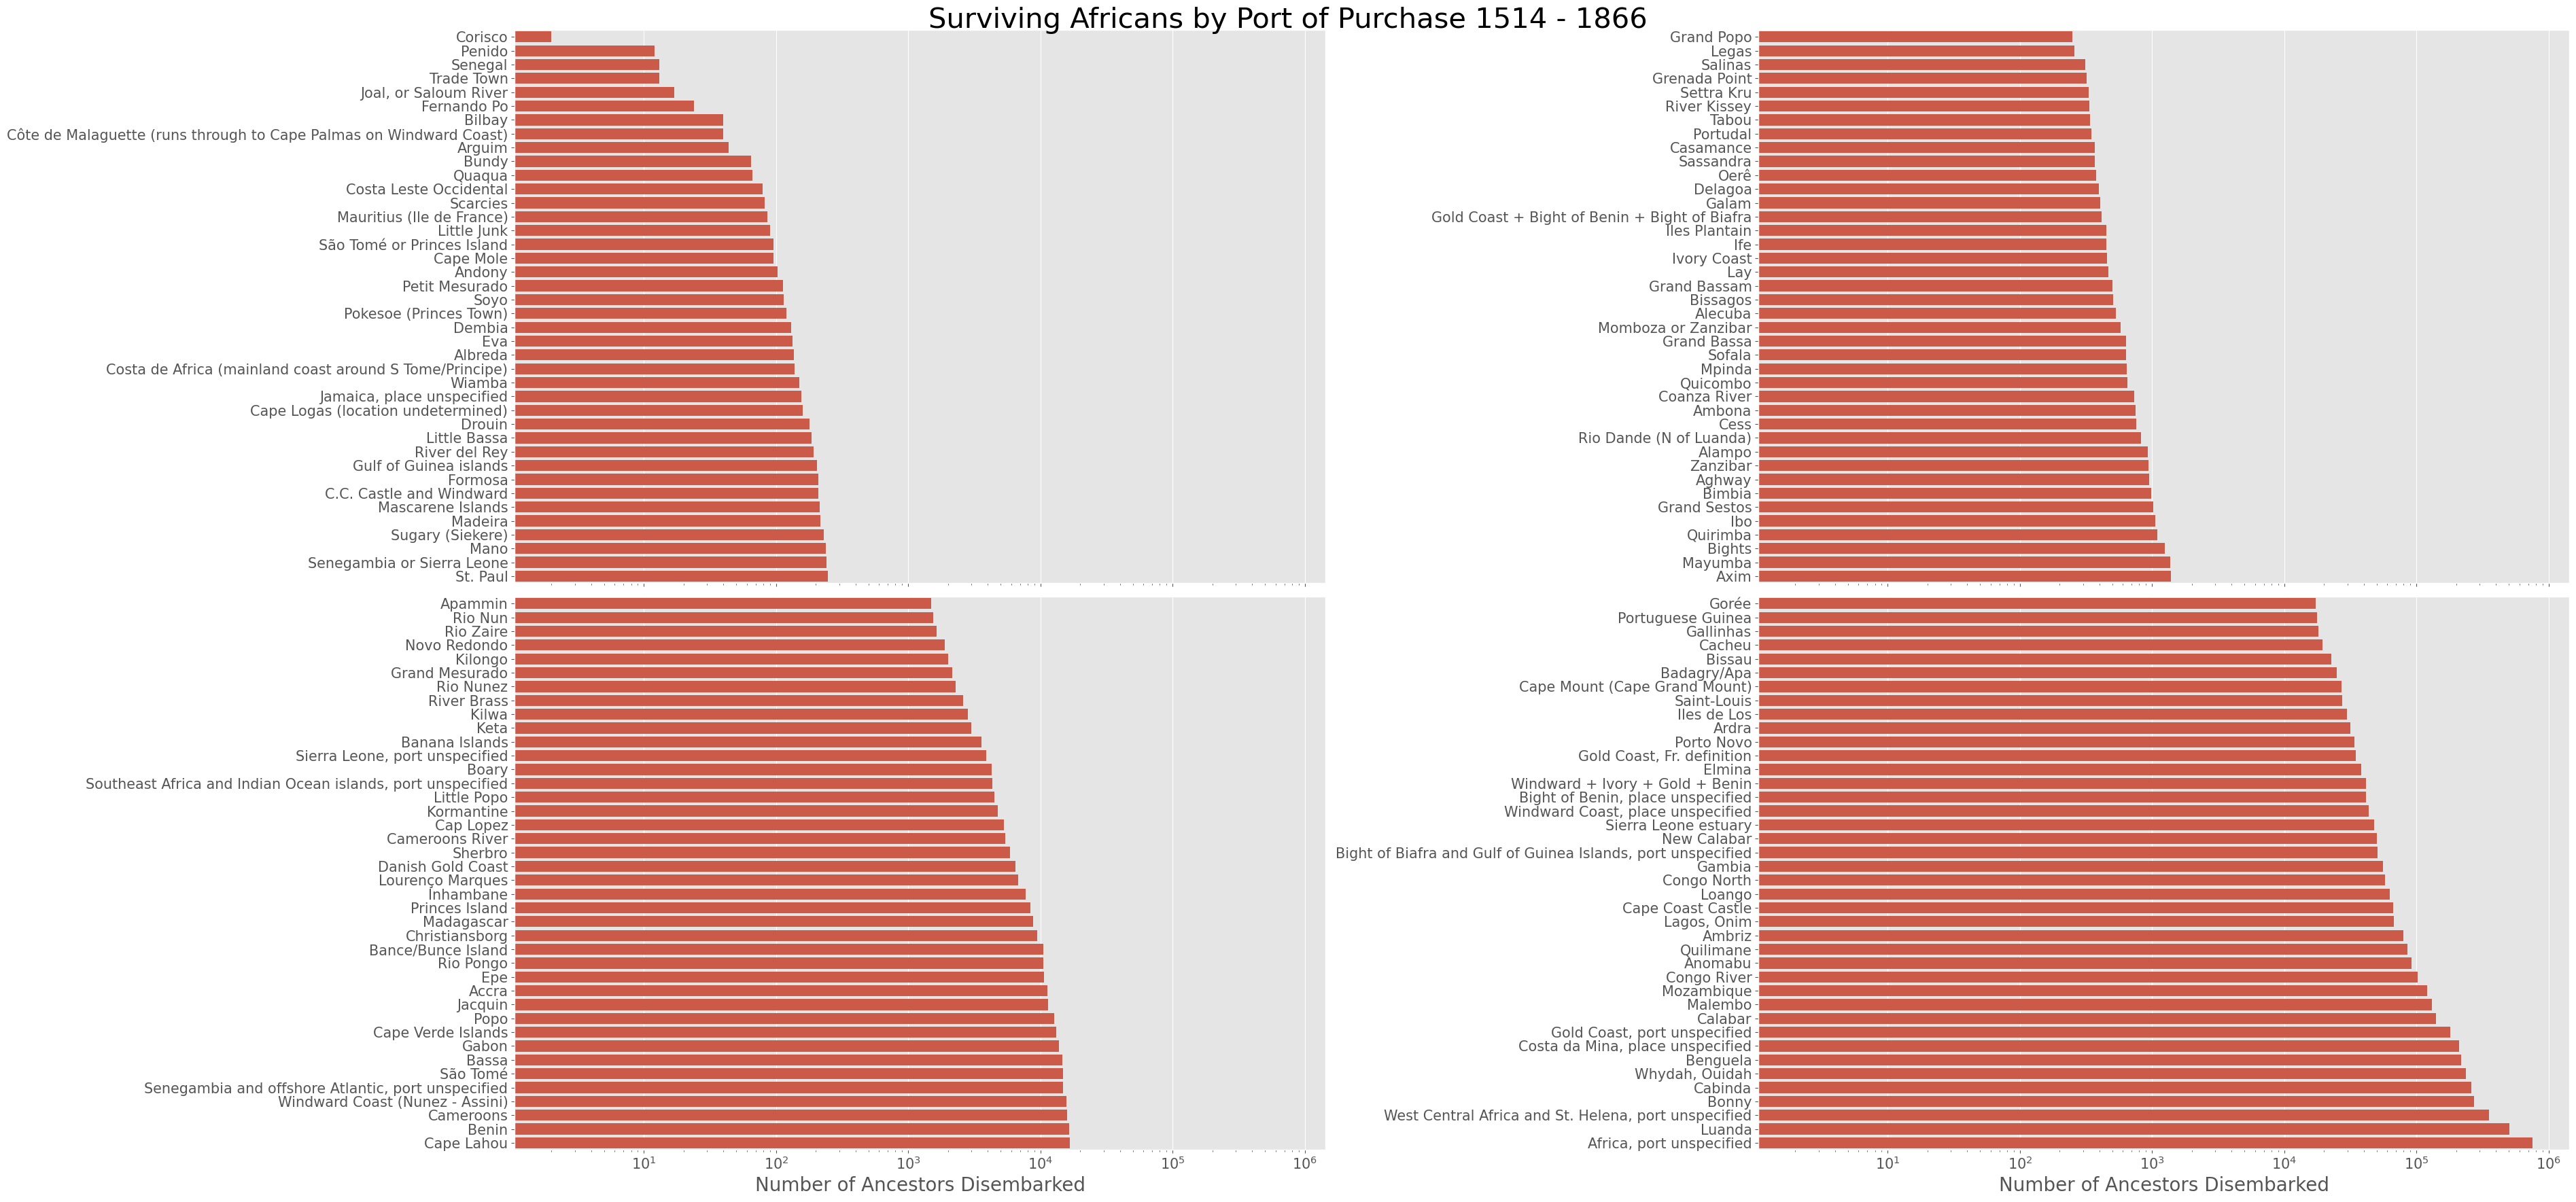

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(38, 18), sharex=True)

sns.barplot(data=captives_by_port[captives_by_port['ancestor_count'] > 0].sort_values('ancestor_count')[:40],
            y='purchase_port',
            x='ancestor_count',
            orient='h',
            ax=axes[0,0])
sns.barplot(data=captives_by_port[captives_by_port['ancestor_count'] > 0].sort_values('ancestor_count')[40:80],
            y='purchase_port',
            x='ancestor_count',
            orient='h',
            ax=axes[0,1])
sns.barplot(data=captives_by_port[captives_by_port['ancestor_count'] > 0].sort_values('ancestor_count')[80:120],
            y='purchase_port',
            x='ancestor_count',
            orient='h',
            ax=axes[1,0])
sns.barplot(data=captives_by_port[captives_by_port['ancestor_count'] > 0].sort_values('ancestor_count')[120:],
            y='purchase_port',
            x='ancestor_count',
            orient='h',
            ax=axes[1,1])

for i in range(2):
    for j in range(2):
        axes[i, j].tick_params(axis='both', which='major', labelsize=15)
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('Number of Ancestors Disembarked', size=20)

fig.suptitle('Surviving Africans by Port of Purchase 1514 - 1866', size=30)

plt.xscale('log')
plt.tight_layout()
plt.show()

In [27]:
trans_atl.groupby('end_port')['ancestor_count'].sum().reset_index()

end_port  ancestor_count
0                                                  ???          3237.0
1                                                Accra            42.0
2                             Africa, port unspecified            77.0
3                           Alagoas, place unspecified           885.0
4                           Amazonia, port unspecified             0.0
..                                                 ...             ...
284                                               Vigo             0.0
285                         Virginia, port unspecified         11243.0
286  West Central Africa and St. Helena, port unspe...             0.0
287                                         York River         28770.0
288                                          Zion Hill          7639.0

[289 rows x 2 columns]

In [28]:
end_port_pie = trans_atl[(trans_atl['end_port'] != '???') & (trans_atl['ancestor_count'] > 0)].groupby('end_port')['ancestor_count'].sum().reset_index()
end_port_pie

end_port  ancestor_count
0                          Accra            42.0
1       Africa, port unspecified            77.0
2     Alagoas, place unspecified           885.0
3                  Amelia Island           351.0
4     Americas, port unspecified          8565.0
..                           ...             ...
238  Venezuela, port unspecified           828.0
239                     Veracruz         31138.0
240   Virginia, port unspecified         11243.0
241                   York River         28770.0
242                    Zion Hill          7639.0

[243 rows x 2 columns]

In [29]:
end_port_pie['ancestor_per'] = end_port_pie['ancestor_count'] / end_port_pie['ancestor_count'].sum() * 100
end_port_pie

end_port  ancestor_count  ancestor_per
0                          Accra            42.0      0.000827
1       Africa, port unspecified            77.0      0.001516
2     Alagoas, place unspecified           885.0      0.017428
3                  Amelia Island           351.0      0.006912
4     Americas, port unspecified          8565.0      0.168671
..                           ...             ...           ...
238  Venezuela, port unspecified           828.0      0.016306
239                     Veracruz         31138.0      0.613201
240   Virginia, port unspecified         11243.0      0.221409
241                   York River         28770.0      0.566568
242                    Zion Hill          7639.0      0.150435

[243 rows x 3 columns]

In [30]:
top_10_end_ports = end_port_pie.sort_values('ancestor_per', ascending=False)[:10]
top_10_end_ports

end_port  ancestor_count  ancestor_per
185                 Rio de Janeiro        683310.0     13.456438
13        Bahia, place unspecified        550194.0     10.834982
109                       Kingston        443498.0      8.733816
15     Barbados, place unspecified        274847.0      5.412568
45                    Cap Français        273490.0      5.385844
96                          Havana        208820.0      4.112297
106     Jamaica, place unspecified        206465.0      4.065920
223    Suriname, place unspecified        189601.0      3.733817
55                      Charleston        112468.0      2.214835
133  Martinique, place unspecified        102898.0      2.026373

In [31]:
 end_port_pie.sort_values('ancestor_count', ascending=False)['end_port'][10:].unique

<bound method Series.unique of 80                                              Freetown
170                                       Port-au-Prince
87                            Grenada, place unspecified
58                                Cuba, port unspecified
51                                             Cartagena
                             ...                        
204    Senegambia and offshore Atlantic, port unspeci...
93                              Gustavia, St. Barthélemy
30                                               Bristol
175                                       Princes Island
79                             France, place unspecified
Name: end_port, Length: 233, dtype: object>

In [32]:
top_10_end_ports.loc[-1] = ['All 233 Other Ports', end_port_pie.sort_values('ancestor_count', ascending=False)['ancestor_count'][10:].sum(), 100 - top_10_end_ports['ancestor_per'].sum()]
top_10_end_ports

end_port  ancestor_count  ancestor_per
 185                 Rio de Janeiro        683310.0     13.456438
 13        Bahia, place unspecified        550194.0     10.834982
 109                       Kingston        443498.0      8.733816
 15     Barbados, place unspecified        274847.0      5.412568
 45                    Cap Français        273490.0      5.385844
 96                          Havana        208820.0      4.112297
 106     Jamaica, place unspecified        206465.0      4.065920
 223    Suriname, place unspecified        189601.0      3.733817
 55                      Charleston        112468.0      2.214835
 133  Martinique, place unspecified        102898.0      2.026373
-1              All 233 Other Ports       2032350.0     40.023112

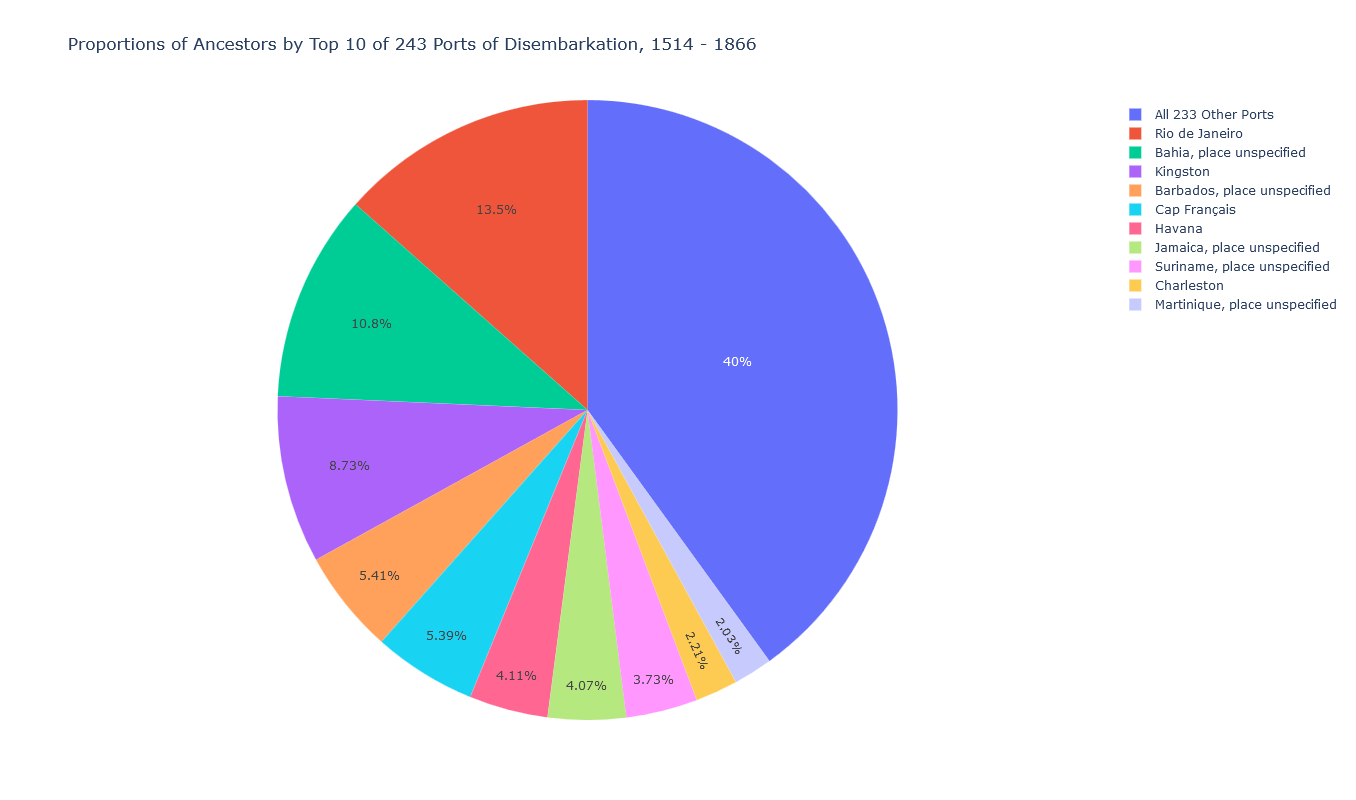

In [63]:
fig = px.pie(top_10_end_ports,
             names='end_port',
             values='ancestor_per',
             title='Proportions of Ancestors by Top 10 of 243 Ports of Disembarkation, 1514 - 1866')

fig.update_layout(width=800,height=800)
fig.show()
fig.write_image('disembarkation_pie_1514_1866.png')

In [67]:
survivors_by_port = trans_atl.groupby('end_port')['ancestor_count'].sum().reset_index()
survivors_by_port.head()

end_port  ancestor_count
0                         ???          3237.0
1                       Accra            42.0
2    Africa, port unspecified            77.0
3  Alagoas, place unspecified           885.0
4  Amazonia, port unspecified             0.0

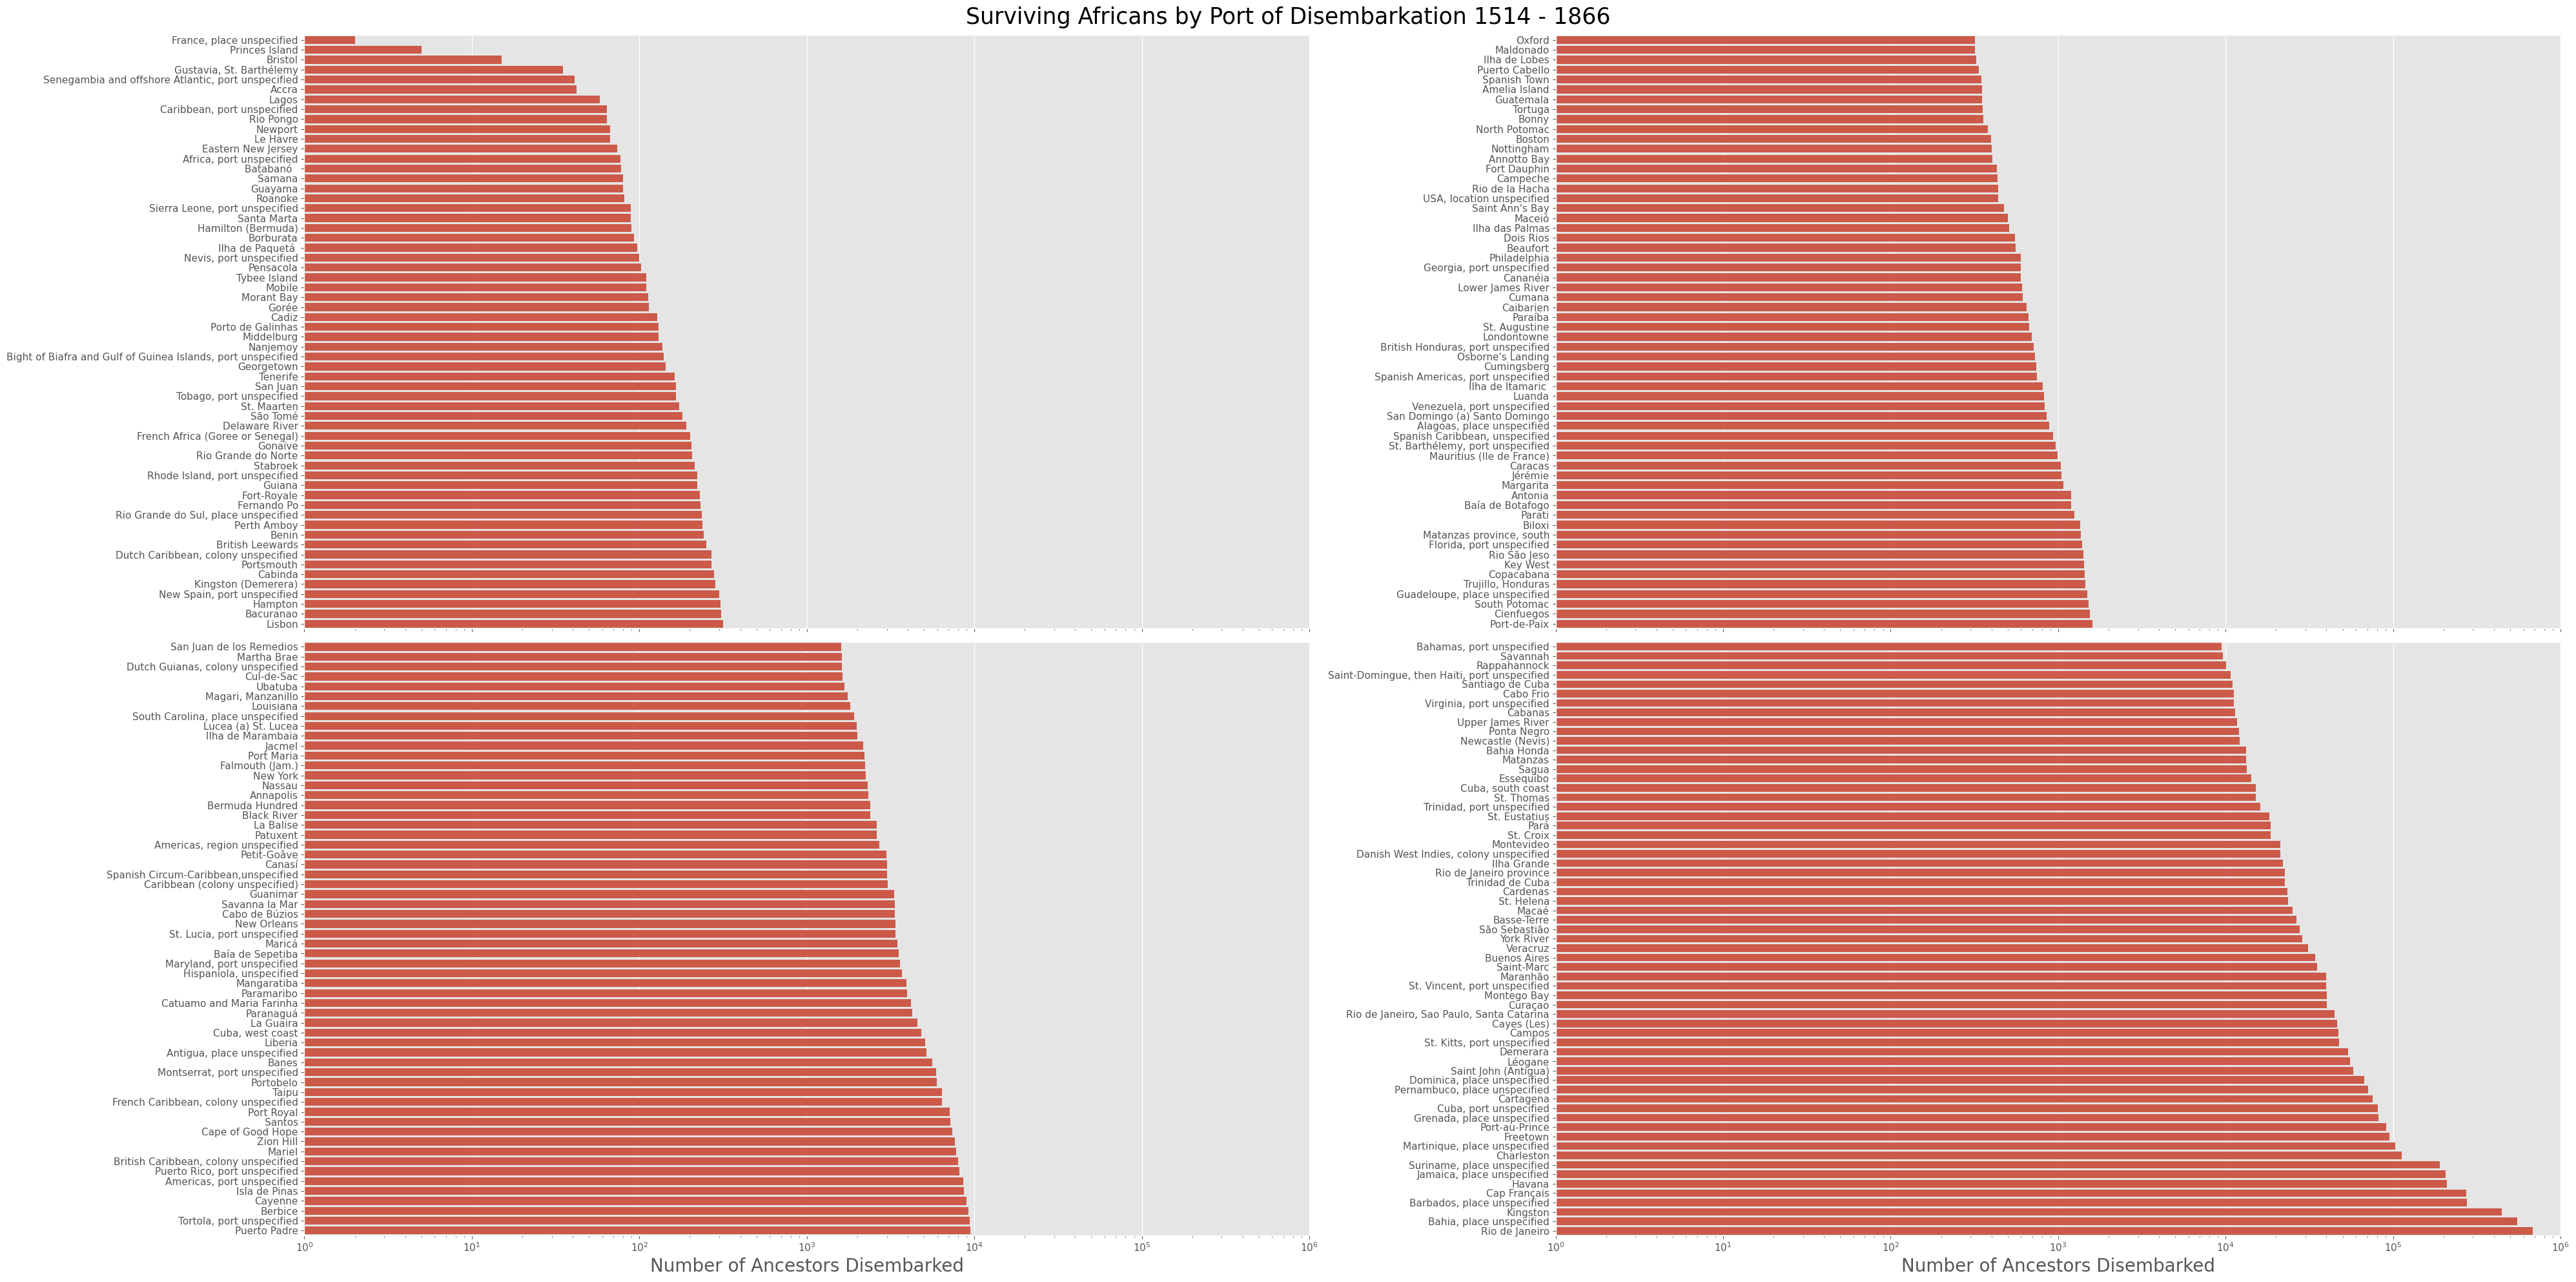

In [109]:
fig, axes = plt.subplots(2, 2, figsize=(40, 20), sharex=True)

sns.barplot(data=survivors_by_port[(survivors_by_port['end_port'] != '???') & (survivors_by_port['ancestor_count'] > 0)].sort_values('ancestor_count')[:60],
            y='end_port',
            x='ancestor_count',
            orient='h',
            ax=axes[0,0])
sns.barplot(data=survivors_by_port[(survivors_by_port['end_port'] != '???') & (survivors_by_port['ancestor_count'] > 0)].sort_values('ancestor_count')[60:120],
            y='end_port',
            x='ancestor_count',
            orient='h',
            ax=axes[0,1])
sns.barplot(data=survivors_by_port[(survivors_by_port['end_port'] != '???') & (survivors_by_port['ancestor_count'] > 0)].sort_values('ancestor_count')[120:180],
            y='end_port',
            x='ancestor_count',
            orient='h',
            ax=axes[1,0])
sns.barplot(data=survivors_by_port[(survivors_by_port['end_port'] != '???') & (survivors_by_port['ancestor_count'] > 0)].sort_values('ancestor_count')[180:],
            y='end_port',
            x='ancestor_count',
            orient='h',
            ax=axes[1,1])

for i in range(2):
    for j in range(2):
        axes[i, j].tick_params(axis='both', which='major', labelsize=11)
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('Number of Ancestors Disembarked', size=20)
        #axes[i, j].set_xscale('log')
        axes[i, j].set_xlim(1, 1000000)
        axes[i, j].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.xscale('log')
fig.suptitle('Surviving Africans by Port of Disembarkation 1514 - 1866',
             size=25,
             y=0.99)

plt.tight_layout()
plt.savefig('survivors_by_disembarkation_bar.png')

plt.show()

In [23]:
end_port = {'end_port': ['Dominica, place unspecified', 'Demerara', 'Havana', 'Charleston', 'Suriname, place unspecified', 'Kingston', 'Grenada, place unspecified', 'British Caribbean, colony unspecified', 'Jamaica, place unspecified', 'Barbados, place unspecified', 'St. Kitts, port unspecified', 'Martinique, place unspecified', 'Tortola, port unspecified', 'St. Thomas', 'Trinidad, port unspecified', 'Montego Bay', 'St. Vincent, port unspecified', 'Basse-Terre', 'Saint John (Antigua)', 'St. Lucia, port unspecified', 'Caribbean (colony unspecified)', 'Bahamas, port unspecified', 'Morant Bay', 'St. Barthélemy, port unspecified', 'Port-au-Prince', 'Savannah', 'Cap Français', 'Hispaniola, unspecified', 'Black River', 'St. Eustatius', 'Guayana, Venezuela', 'Antigua, place unspecified', 'Cayenne', 'Zion Hill', 'St. Maarten', 'New Orleans', 'French Caribbean, colony unspecified', 'British Leewards', 'St. Croix', 'Montevideo', 'Americas, port unspecified', 'Cayes (Les)', 'Berbice', 'Port Maria', 'Cumingsberg', 'Guadeloupe, place unspecified', 'La Guaira', 'Falmouth (Jam.)', 'Lucea (a) St. Lucea', "Saint Ann's Bay", 'Montserrat, port unspecified', 'Savanna la Mar', 'Puerto Rico, port unspecified', 'Nassau', 'Cuba, port unspecified', 'Stabroek', 'Malembo', 'Newcastle (Nevis)', 'Annotto Bay', 'Puerto Cabello', 'Spanish Town', 'North Carolina, port unspecified', 'Potomac river', 'Rappahannock', 'St. Augustine', 'Oxford', 'Maryland, port unspecified', 'Martha Brae', 'Pensacola', 'Mississippi', 'British Honduras, port unspecified', 'Patuxent', 'Port Royal', 'Buenos Aires', 'Senegambia and offshore Atlantic, port unspecified', 'Saint-Domingue, then Haiti, port unspecified', 'Beaufort', 'La Balise', 'Kingston (Demerera)', 'Môle Saint Nicolas', 'Santiago de Cuba', 'Antonia', 'York River', 'Portobelo', 'Virginia, port unspecified', 'Pernambuco, place unspecified', 'Spanish Americas, port unspecified', 'Florida, port unspecified', 'Annapolis', 'Upper James River', 'Lower James River', 'South Carolina, place unspecified', 'Veracruz', 'New York', 'Londontowne', 'Cartagena', 'South Potomac', 'Hampton', 'Trinidad de Cuba', 'Spanish Caribbean, unspecified', 'Lisbon', 'USA, location unspecified', 'Cadiz', 'Lower Cedar Point', 'Sierra Leone, port unspecified', 'Caribbean, port unspecified', 'Nottingham', 'Bahia, place unspecified', 'Rio de Janeiro', 'Maranhão', 'Cape of Good Hope', 'Americas, region unspecified', 'Rio de Janeiro, Sao Paulo, Santa Catarina',
                         'Ilha de Marambaia', 'Santos', 'Rio Grande do Sul, place unspecified', 'Freetown', 'Colonia de Sacramento', 'Pará', 'Ilha Grande', 'Nevis, port unspecified', 'Curaçao', 'Essequibo', 'Dutch Guianas, colony unspecified', 'Paramaribo', 'Caracas', 'Spanish Circum-Caribbean,unspecified', 'Dutch Caribbean, colony unspecified', 'Guiana', 'Ilha de Itamaricá', 'São Tomé', 'Lagos', 'Trujillo, Honduras', 'Guatemala', 'Tenerife', 'Cumana', 'Canary Islands', 'Tobago, port unspecified', 'Cabo de Búzios', 'Matanzas', 'Cabanas', 'Cuba, south coast', 'Cuba, west coast', 'Bahia Honda', 'Banes', 'Brazil, place unspecified', 'Belém', 'Amazonia, port unspecified', 'Paranaguá', 'Catuamo and Maria Farinha', 'Mariel', 'Sagua', 'Guanimar', 'Magari, Manzanillo', 'São Sebastião', 'Campos', 'Rio de Janeiro province', 'Macaé', 'Alagoas, place unspecified', 'San Juan de los Remedios', 'Rio São Jeso', 'Cabo Frio', 'Cape Coast Castle', 'Pointe-à-Pitre', 'Southeast Brazil, port unspecified', 'Fernando Po', 'Parati', 'Hamilton (Bermuda)', 'Boston', 'Africa, port unspecified', 'British Americas, port unspecified', 'Rhode Island, port unspecified', 'Delaware River', 'Philadelphia', 'Campeche', 'San Juan', 'West Central Africa and St. Helena, port unspecified', 'Bacuranao', 'Eastern New Jersey', 'Piscataqua', 'Bristol', 'Newport', 'North Potomac', 'Bermuda Hundred', 'Perth Amboy', 'Louisiana', 'Saint-Pierre', 'French Africa (Goree or Senegal)', 'Elmina', 'Danish West Indies, colony unspecified', 'Margarita', 'Rio Pongo', 'Gorée', 'Isla de Pinas', 'Maldonado', 'Ilha de Lobes', 'Taipu', 'Ponta Negro', 'Ubatuba', 'Pôrto Seguro', 'Ilha das Palmas', 'Maricá', 'Mangaratiba', 'Copacabana', 'Baía de Sepetiba', 'Ilha de Paquetá', 'Baía de Botafogo', 'Canasí', 'Cananéia', 'Nuevitas', 'Baracoa', 'San Domingo (a) Santo Domingo', 'New Spain, port unspecified', 'Nombre de Dios', 'Puerto de Plata', 'Monte Christi', 'Rio de la Plata, port unspecified', 'Rio de la Hacha', 'Ocoa', 'Santa Marta', 'Guayama', 'San Germán', 'Puerto de Caballos (Puerto Cortes)', 'Luanda', 'Cardenas', 'Liberia', 'Puerto Padre', 'Key West', 'Dois Rios', 'St. Helena', 'Maceió', 'Mauritius (Ile de France)', 'Georgia, port unspecified', 'Gustavia, St. Barthélemy', 'Le Havre', 'France, place unspecified', 'Princes Island', 'Vigo', 'Santa Catarina', 'Middelburg', 'Cienfuegos', 'Caibarien', 'Matanzas province, south', 'Ile de France', 'Gonaïve', 'Paraíba', 'Santo Tomas', 'Porto de Galinhas',
                         'Seville', 'Honduras, port unspecified', 'Iberian World, port unspecified', 'Amelia Island', 'Venezuela, port unspecified', 'Batabanó ', 'Roanoke', 'New Providence', 'Tybee Island', 'Mosquito Shore', 'Mobile', 'Middletown', 'New London', "Osborne's Landing", 'Tortuga', 'Fort-Royale', 'Nanjemoy', 'Portsmouth', 'Bonny', 'Georgetown', 'Bight of Biafra and Gulf of Guinea Islands, port unspecified', 'Jacmel', 'Orinoko', 'Jérémie', 'Léogane', 'Saint-Marc', 'Petit-Goâve', 'Port-de-Paix', 'Fort Dauphin', 'Biloxi', 'Cul-de-Sac', 'Bissagos', 'Rio Grande do Norte', 'Cabinda', 'Arcahaie', 'Borburata', 'Portugal, port unspecified', 'Accra', 'Benin', 'Samana'],
            'guess': ['Roseau', 'Georgetown', 'Havana', 'Charleston', 'Paramaribo', 'Kingston', 'St. George\'s', 'Unknown', 'Kingston', 'Bridgetown', 'Basseterre', 'Fort-de-France', 'Road Town', 'Charlotte Amalie', 'Port of Spain', 'Montego Bay', 'Kingstown', 'Basse-Terre', 'Saint John\'s', 'Castries', 'Unknown', 'Nassau', 'Morant Bay', 'Gustavia', 'Port-au-Prince', 'Savannah', 'Cap-Haïtien', 'Santo Domingo', 'Black River', 'Oranjestad', 'Ciudad Guayana', 'St. John\'s', 'Cayenne', 'Unknown', 'Philipsburg', 'New Orleans', 'Unknown', 'Unknown', 'Christiansted', 'Montevideo', 'Unknown', 'Les Cayes', 'New Amsterdam', 'Port Maria', 'Unknown', 'Basse-Terre', 'La Guaira', 'Falmouth', 'Lucea', 'Saint Ann\'s Bay', 'Plymouth', 'Savanna-la-Mar', 'San Juan', 'Nassau', 'Havana', 'Georgetown', 'Malembo', 'Charlestown', 'Annotto Bay', 'Puerto Cabello', 'Spanish Town', 'Wilmington', 'Alexandria', 'Tappahannock', 'St. Augustine', 'Oxford', 'Baltimore', 'Falmouth', 'Pensacola', 'Biloxi', 'Belize City', 'Unknown', 'Port Royal', 'Buenos Aires', 'Dakar', 'Port-au-Prince', 'Beaufort', 'Unknown', 'Georgetown', 'Môle-Saint-Nicolas', 'Santiago de Cuba', 'Unknown', 'Yorktown', 'Portobelo', 'Norfolk', 'Recife', 'Unknown', 'Jacksonville', 'Annapolis', 'Richmond', 'Newport News', 'Charleston', 'Veracruz', 'New York City', 'Unknown', 'Cartagena', 'Unknown', 'Hampton', 'Trinidad', 'Unknown', 'Lisbon', 'Unknown', 'Cádiz', 'Unknown', 'Freetown', 'Unknown', 'Unknown', 'Salvador', 'Rio de Janeiro', 'São Luís', 'Cape Town', 'Unknown', 'Unknown', 'Ilha de Marambaia', 'Santos', 'Porto Alegre', 'Freetown', 'Colonia del Sacramento', 'Belém', 'Ilha Grande', 'Charlestown', 'Willemstad', 'Unknown', 'Paramaribo', 'Paramaribo', 'Caracas', 'Unknown', 'Unknown', 'Georgetown', 'Ilha de Itamaracá', 'São Tomé', 'Lagos', 'Trujillo', 'Guatemala City', 'Santa Cruz de Tenerife', 'Cumaná', 'Santa Cruz de Tenerife', 'Scarborough', 'Armação dos Búzios', 'Matanzas', 'Cabanas', 'Cienfuegos', 'Havana', 'Bahía Honda', 'Banes', 'Rio de Janeiro', 'Belém', 'Manaus', 'Paranaguá', 'Unknown', 'Mariel', 'Sagua la Grande', 'Unknown', 'Manzanillo', 'São Sebastião', 'Campos dos Goytacazes', 'Rio de Janeiro', 'Macaé', 'Maceió', 'San Juan de los Remedios', 'Unknown', 'Cabo Frio', 'Cape Coast', 'Pointe-à-Pitre', 'São Paulo', 'Malabo', 'Paraty', 'Hamilton', 'Boston', 'Unknown', 'Unknown', 'Providence', 'Philadelphia', 'Philadelphia', 'Campeche', 'San Juan', 'Unknown',
                      'Unknown', 'Newark', 'Portsmouth', 'Bristol', 'Newport', 'Unknown', 'Unknown', 'Perth Amboy', 'New Orleans', 'Saint-Pierre', 'Dakar', 'Elmina', 'Charlotte Amalie', 'Porlamar', 'Boffa', 'Gorée', 'Isla de la Juventud', 'Maldonado', 'Unknown', 'Unknown', 'Natal', 'Ubatuba', 'Porto Seguro', 'Unknown', 'Maricá', 'Mangaratiba', 'Rio de Janeiro', 'Sepetiba', 'Rio de Janeiro', 'Rio de Janeiro', 'Unknown', 'Cananéia', 'Nuevitas', 'Baracoa', 'Santo Domingo', 'Mexico City', 'Nombre de Dios', 'Puerto Plata', 'Monte Cristi', 'Buenos Aires', 'Riohacha', 'Unknown', 'Santa Marta', 'Guayama', 'San Germán', 'Puerto Cortés', 'Luanda', 'Cárdenas', 'Monrovia', 'Puerto Padre', 'Key West', 'Unknown', 'Jamestown', 'Maceió', 'Port Louis', 'Savannah', 'Gustavia', 'Le Havre', 'Paris', 'São Tomé', 'Vigo', 'Florianópolis', 'Middelburg', 'Cienfuegos', 'Caibarién', 'Matanzas', 'Port Louis', 'Gonaïves', 'João Pessoa', 'Unknown', 'Porto de Galinhas', 'Seville', 'Tegucigalpa', 'Unknown', 'Fernandina Beach', 'Caracas', 'Batabanó', 'Roanoke', 'Nassau', 'Tybee Island', 'Unknown', 'Mobile', 'Middletown', 'New London', 'Unknown', 'Île de la Tortue', 'Fort-de-France', 'Unknown', 'Portsmouth', 'Bonny', 'Georgetown', 'Unknown', 'Jacmel', 'Ciudad Guayana', 'Jérémie', 'Léogâne', 'Saint-Marc', 'Petit-Goâve', 'Port-de-Paix', 'Fort-Liberté', 'Biloxi', 'Unknown', 'Bissau', 'Natal', 'Cabinda', 'Arcahaie', 'Puerto Cabello', 'Lisbon', 'Accra', 'Cotonou', 'Santa Barbara de Samana'],
            'lat': [15.3010, 6.8013, 23.1136, 32.7765, 5.8520, 18.0179, 12.0560, 0.0, 18.0179, 13.1132, 17.2956, 14.6161, 18.4271, 18.3419, 10.6550, 18.4712, 13.1583, 16.0341, 17.1274, 14.0101, 0.0, 25.0480, 17.8815, 17.8960, 18.5944, 32.0809, 19.7597, 18.4861, 18.0284, 17.4890, 8.3535, 17.1274, 4.9371, 0.0, 18.0237, 29.9511, 0.0, 0.0, 17.7459, -34.9033, 0.0, 18.2001, 6.2452, 18.4024, 0.0, 16.0341, 10.6037, 18.4949, 18.4512, 18.4321, 16.7418, 18.2194, 18.4655, 25.0480, 23.1136, 6.8013, -6.8000, 17.1417, 18.2745, 10.4806, 17.9991, 34.2104, 38.8048, 37.9268, 29.9012, 38.7860, 39.2904, 18.4949, 30.4213, 30.3968, 17.4995, 0.0, 17.9880, -34.6037, 14.6928, 18.5944, 34.7184, 0.0, 6.8013, 19.7979, 20.0211, 0.0, 37.2388, 9.5500, 36.8508, -8.0539, 0.0, 30.3322, 38.9784, 37.5407, 36.9787, 32.7765, 19.1922, 40.7128, 0.0, 10.3910, 0.0, 37.0298, 21.0042, 0.0, 38.7223, 0.0, 36.5298, 0.0, 8.4840, 0.0, 0.0, -12.9777, -22.9068, -2.5307, -33.9249, 0.0, 0.0, -23.0464, -23.9618, -30.0346, 8.4840, -34.4626, -1.4558, -23.1456, 17.1417, 12.1084, 0.0, 5.8520, 5.8520, 10.4806, 0.0, 0.0, 6.8013, -7.8143, 0.3358, 6.5244, 15.9172, 14.6349, 28.4636, 10.4635, 28.4636, 11.1900, -22.7469, 23.0542, 22.9675, 22.1456, 23.1136, 22.8908, 20.3675, -22.9068, -1.4558, -3.1190, -25.5161, 0.0, 23.0206, 22.8068, 0.0, 20.3436, -23.8064, -21.7545, -22.9068, -22.3708, -9.6658, 22.3962, 0.0, -22.8789, 5.1053, 16.2376, -23.5505, 3.7523, -23.2175, 32.2949, 42.3601, 0.0, 0.0, 41.8240, 39.9526, 39.9526, 19.8305, 18.4655, 0.0, 0.0, 40.7357, 43.0718, 41.6771, 41.4901, 0.0, 0.0, 40.5067, 29.9511, 14.7756, 14.6937, 5.0910, 18.3419, 11.0784, 10.1833, 14.6673, 21.7097, -34.9011, 0.0, 0.0, -5.7793, -23.4336, -16.4436, 0.0, -22.9194, -22.9594, -22.9068, -22.9698, -22.7641, -22.9068, 0.0, -25.0144, 21.5456, 20.3506, 18.4861, 19.4326, 9.5833, 19.7934, 19.8494, -34.6037, 11.5444, 0.0, 11.2408, 17.9689, 18.0807, 15.8418, -8.8389, 23.0372, 6.3105, 21.2017, 24.5551, 0.0, -15.9250, -9.6658, -20.1609, 32.0809, 17.8960, 49.4944, 48.8566, 0.3358, 42.2406, -27.5954, 51.4988, 22.1456, 22.5219, 23.0542, -20.1609, 19.4512, -7.1195, 0.0, -8.5079, 37.3889, 14.0723, 0.0, 30.6694, 10.4806, 22.7214, 35.9382, 25.0480, 32.0000, 0.0, 30.6954, 41.5623, 41.3557, 0.0, 20.0500, 14.6161, 0.0, 50.8198, 4.4428, 6.8013, 0.0, 18.2353, 8.3535, 18.6432, 18.5111, 19.1082, 18.4309, 19.9399, 19.6667, 30.3968, 0.0, 11.8667, -5.7793, -5.5500, 18.7941, 10.4806, 38.7223, 5.5560, 6.3676, 19.2058],
            'lon': [-61.3881, -58.1551, -82.3666, -79.9311, -55.2038, -76.8099, -61.7500, 0.0, -76.8099, -59.5988, -62.7291, -61.0588, -64.6185, -64.9307, -61.5165, -77.9188, -61.2242, -61.7333, -61.8448, -61.0070, 0.0, -77.3554, -76.4093, -62.8508, -72.3074, -81.0912, -72.2006, -69.9312, -77.8486, -62.9736, -62.7530, -61.8448, -52.3269, 0.0, -63.0458, -90.0715, 0.0, 0.0, -64.7043, -56.1882, 0.0, -73.7500, -57.3264, -76.8888, 0.0, -61.7333, -66.9346, -77.6536, -78.1735, -77.2026, -62.2087, -78.1318, -66.1057, -77.3554, -82.3666, -58.1551, 12.3500, -62.6250, -76.7602, -68.0349, -76.7935, -77.9447, -77.0469, -76.8164, -81.3124, -76.0672, -76.6122, -77.6536, -87.2169, -88.8853, -88.1962, 0.0, -76.8019, -58.3816, -17.4467, -72.3074, -76.6693, 0.0, -58.1551, -72.8023, -75.8369, 0.0, -76.7074, -79.4000, -76.2859, -34.8811, 0.0, -81.6557, -76.4928, -77.4360, -76.4347, -79.9311, -96.1342, -74.0060, 0.0, -75.4794, 0.0, -76.3452, -79.9865, 0.0, -9.1393, 0.0, -6.2974, 0.0, -13.2340, 0.0, 0.0, -38.5016, -43.1729, -44.3028, 18.4233, 0.0, 0.0, -43.9086, -46.3322, -51.2177, -13.2340, -57.8400, -48.5044, -44.1680, -62.6250, -68.9445, 0.0, -55.2038, -55.2038, -66.9346, 0.0, 0.0, -58.1551, -34.8208, 6.7335, 3.3792, -85.9423, -90.5069, -16.2518, -64.1905, -16.2518, -60.7500, -41.8887, -81.5729, -83.1583, -80.4139, -82.3666, -79.5569, -75.7117, -43.1729, -48.5044, -60.0217, -48.5162, 0.0, -82.7518, -80.0746, 0.0, -76.6194, -45.3930, -41.3244, -43.1729, -41.7869, -35.7350, -79.8487, 0.0, -42.0150, -1.2466, -61.5332, -46.6333, 8.7820, -44.7128, -64.7827, -71.0589, 0.0, 0.0, -71.4128, -75.1652, -75.1652, -90.5359, -66.1057, 0.0, 0.0, -74.1724, -70.7626, -71.2662, -71.3128, 0.0, 0.0, -74.2654, -90.0715, -61.1753, -17.4441, -1.2437, -64.9307, -63.8615, -14.0333, -17.3989, -82.8089, -56.1894, 0.0, 0.0, -35.2009, -45.0712, -39.0644, 0.0, -42.8194, -44.0409, -43.1729, -43.7077, -43.1566, -43.1729, 0.0, -47.9256, -77.2644, -74.5008, -69.9312, -99.1332, -79.4667, -70.6884, -71.6540, -58.3816, -72.9061, 0.0, -74.1990, -66.1138, -67.1338, -87.9520, 13.2894, -81.2075, -10.8047, -76.5738, -81.7800, 0.0, -5.7089, -35.7350, 57.4977, -81.0912, -62.8508, 0.1232, 2.3522, 6.7335, -8.7207, -48.5671, 3.6149, -80.4139, -79.5150, -81.5729, 57.4977, -72.6837, -34.8450, 0.0, -35.0217, -5.9833, -87.2068, 0.0, -81.4626, -66.9346, -82.2892, -77.2852, -77.3554, -80.8453, 0.0, -88.0399, -72.6515, -72.0995, 0.0, -72.8500, -61.0588, 0.0, -1.0873, 7.1708, -58.1551, 0.0, -72.5137, -62.7530, -74.1181, -72.6065, -72.6932, -72.8545, -72.8359, -72.0167, -88.8853, 0.0, -15.6000, -35.2009, 12.4500, -72.7151, -68.0349, -9.1393, -0.1969, 2.4419, -69.3383]}

In [36]:
end_ports = pd.DataFrame(end_port)
end_ports

end_port                    guess      lat      lon
0    Dominica, place unspecified                   Roseau  15.3010 -61.3881
1                       Demerara               Georgetown   6.8013 -58.1551
2                         Havana                   Havana  23.1136 -82.3666
3                     Charleston               Charleston  32.7765 -79.9311
4    Suriname, place unspecified               Paramaribo   5.8520 -55.2038
..                           ...                      ...      ...      ...
283                    Borburata           Puerto Cabello  10.4806 -68.0349
284   Portugal, port unspecified                   Lisbon  38.7223  -9.1393
285                        Accra                    Accra   5.5560  -0.1969
286                        Benin                  Cotonou   6.3676   2.4419
287                       Samana  Santa Barbara de Samana  19.2058 -69.3383

[288 rows x 4 columns]

In [37]:
end_ports_reduced = end_ports[end_ports['guess'] != 'Unknown']

In [67]:
end_ports_map = folium.Map(location=[-15.1609, 15.4977], zoom_start=3)
ports = plugins.MarkerCluster().add_to(end_ports_map)

for lat, lon, label in zip(end_ports_reduced['lat'], end_ports_reduced['lon'], end_ports_reduced['end_port']):
    (folium.Marker(location=[lat, lon],
                   icon=None,
                   popup=label)
     .add_to(ports))
    
end_ports_map

In [39]:
ports_dict = {
'port': ['Bonny', 'Congo River', 'Windward Coast (Nunez - Assini)', 'Gallinhas', 'Africa, port unspecified', 'Sierra Leone estuary', 'Cape Coast Castle', 'Gorée', 'Bight of Biafra and Gulf of Guinea Islands, port unspecified', 'Iles de Los', 'Gabon', 'Gold Coast, port unspecified', 'Cameroons', 'Bance/Bunce Island', 'Calabar', 'Bassa', 'West Central Africa and St. Helena, port unspecified', 'Lagos, Onim', 'Bight of Benin, place unspecified', 'Cape Mount (Cape Grand Mount)', 'Whydah, Ouidah', 'Ambriz', 'New Calabar', 'Accra', 'Malembo', 'Anomabu', 'Rio Pongo', 'Cabinda', 'Sierra Leone, port unspecified', 'Windward Coast, place unspecified', 'Senegambia and offshore Atlantic, port unspecified', 'Gambia', 'Cap Lopez', 'Porto Novo', 'Benin', 'Congo North', 'Bimbia', 'Loango', 'Cape Mole', 'Badagry/Apa', 'Rio Nunez', 'Ambona', 'Banana Islands', 'Little Junk', 'Cape Lahou', 'Popo', 'Senegambia or Sierra Leone', 'Bissagos', 'Grand Mesurado', 'Bundy', 'Alecuba', 'Cameroons River', 'Grenada Point', 'Cacheu', 'Cape Logas (location undetermined)', 'Saint-Louis', 'Apollonia', 'Galam', 'Casamance', 'River del Rey', 'Madagascar', 'Grand Sestos', 'Elmina', 'Casnasonis (location undetermined)', 'Legas', 'Bilbay', 'Tabou', 'Bissau', 'Windward + Ivory + Gold + Benin', 'C.C. Castle and Windward', 'St. Paul', 'Mano', 'Sherbro', 'Rock Sestos', 'Keta', 'Axim', 'Jacquin', 'Settra Kru', 'Southeast Africa and Indian Ocean islands, port unspecified', 'Princes Island', 'Jamaica, place unspecified', 'Little Popo', 'Sofala', 'Luanda', 'Costa da Mina, place unspecified', 'Mozambique', 'Lourenço Marques', 'Quilimane', 'Benguela', 'Inhambane', 'São Tomé or Princes Island', 'Rio Zaire', 'Rio Forcados/Formosa/Benin', 'Ardra', 'Kormantine', 'Alampo', 'Boary', 'Apammin', 'Lay', 'Corisco', 'Grand Popo', 'Mpinda', 'Ivory Coast', 'Cess', 'Gold Coast + Bight of Benin + Bight of Biafra', 'São Tomé', 'Cape Verde Islands', 'Bights', 'River Brass', 'Penido', 'Grand Bassa', 'Kilwa', 'Coanza River', 'Portuguese Guinea', 'Salinas', 'Little Bassa', 'Trade Town', 'Rio Nun', 'Cape of Good Hope', 'Formosa', 'Novo Redondo', 'Rio Grande', 'Calabary', 'Sassandra', 'Gulf of Guinea islands', 'Pokesoe (Princes Town)', 'Cabo Lopo Gonçalves', 'Christiansborg', 'Costa de Africa (mainland coast around S Tome/Principe)', 'Wiamba', 'Drouin', 'Mayumba', 'Momboza or Zanzibar', 'Cacandia', 'Grand Bassam', 'St. Lawrence', 'Soyo', 'Portudal', 'Arguim', 'Iles Plantain', 'Costa Leste Occidental', 'Zanzibar', 'Puerto Rico, port unspecified', 'Princes Island and Elmina', 'Albreda', 'Seville', 'Senegal', 'Rio Dande (N of Luanda)', 'Kilongo', 'Ibo', 'Mossulo, Luanda', 'Aghway', 'Quirimba', 'Quicombo', 'Amokou', 'Gold Coast, Fr. definition', 'Côte de Malaguette (runs through to Cape Palmas on Windward Coast)', 'Touau-Toro (location undetermined)', 'Cape Grand Mount', 'Danish Gold Coast', 'Epe', 'Gold Coast east of Kormantine', 'West of Cape Apolonia', 'French Africa (Goree or Senegal)', 'Madeira', 'Andony', 'Liverpool River', 'River Kissey', 'Quaqua', 'Rio Nazareth', 'Mauritius (Ile de France)', 'Fernando Po', 'Ife', 'Oerê', 'Gold Coast from Kormatine to Accra', 'Rio Assini', 'Delagoa', 'Dembia', 'Sugary (Siekere)', 'Chama', 'Grand Junk', 'Asia e Africa, port unspecified', 'Canary Islands', 'Eva', 'Petit Mesurado', 'Scarcies', 'Joal, or Saloum River', 'Mascarene Islands'],
'guess': ['Bonny', 'Boma', 'Monrovia', 'Gallinas', 'Unknown', 'Freetown', 'Cape Coast', 'Gorée', 'Unknown', 'Îles de Los', 'Libreville', 'Accra', 'Douala', 'Bunce Island', 'Calabar', 'Buchanan', 'Unknown', 'Lagos', 'Cotonou', 'Robertsport', 'Ouidah', 'Ambriz', 'New Calabar', 'Accra', 'Malembo', 'Anomabu', 'Boffa', 'Cabinda', 'Freetown', 'Monrovia', 'Dakar', 'Banjul', 'Port-Gentil', 'Porto-Novo', 'Cotonou', 'Pointe-Noire', 'Limbe', 'Loango', 'Unknown', 'Badagry', 'Boké', 'Unknown', 'Banana Islands', 'Unknown', 'Grand-Lahou', 'Aného', 'Dakar', 'Bissau', 'Monrovia', 'Unknown', 'Unknown', 'Douala', 'Unknown', 'Cacheu', 'Unknown', 'Saint-Louis', 'Axim', 'Unknown', 'Ziguinchor', 'Calabar', 'Toamasina', 'Buchanan', 'Elmina', 'Unknown', 'Unknown', 'Unknown', 'Tabou', 'Bissau', 'Unknown', 'Unknown', 'Monrovia', 'Unknown', 'Bonthe', 'Buchanan', 'Keta', 'Axim', 'Unknown', 'Settra Kru', 'Maputo', 'São Tomé', 'Kingston', 'Aného', 'Sofala', 'Luanda', 'Unknown', 'Maputo', 'Maputo', 'Quelimane', 'Benguela', 'Inhambane', 'São Tomé', 'Soyo', 'Forcados', 'Allada', 'Saltpond', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Corisco', 'Grand-Popo', 'Soyo', 'Abidjan', 'Buchanan', 'Unknown', 'São Tomé', 'Praia', 'Unknown', 'Brass', 'Unknown', 'Buchanan', 'Kilwa Kisiwani', 'Cuanza River', 'Bissau', 'Unknown', 'Buchanan', 'Unknown', 'Unknown', 'Cape Town', 'Unknown', 'Ngunza', 'Rio Grande', 'Unknown', 'Sassandra', 'Unknown', 'Princes Town', 'Port-Gentil', 'Osu', 'Unknown', 'Unknown', 'Unknown', 'Mayumba', 'Zanzibar City', 'Unknown', 'Grand-Bassam', 'Unknown', 'Soyo', 'Portudal', 'Arguin', 'Unknown', 'Unknown', 'Zanzibar City', 'San Juan', 'Unknown', 'Albreda', 'Seville', 'Dakar', 'Luanda', 'Unknown', 'Ibo', 'Luanda', 'Unknown', 'Quirimba', 'Unknown', 'Unknown', 'Accra', 'Unknown', 'Unknown', 'Robertsport', 'Accra', 'Epe', 'Accra', 'Unknown', 'Dakar', 'Funchal', 'Andoni', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Port Louis', 'Malabo', 'Ife', 'Unknown', 'Accra', 'Assinie', 'Maputo', 'Unknown', 'Unknown', 'Shama', 'Unknown', 'Unknown', 'Santa Cruz de Tenerife', 'Unknown', 'Monrovia', 'Unknown', 'Joal-Fadiouth', 'Port Louis'],
'lat': [4.4428, -5.8515, 6.3105, 7.5833, 0.0, 8.4840, 5.1051, 14.6673, 0.0, 9.4000, 0.4162, 5.5560, 4.0511, 8.5167, 4.9589, 5.8667, 0.0, 6.5244, 6.3676, 6.7500, 6.3676, -7.8486, 4.9589, 5.5560, -6.8000, 5.1846, 10.1833, -5.5500, 8.4840, 6.3105, 14.6928, 13.4539, -0.7193, 6.4969, 6.3676, -4.7889, 4.0214, -4.6500, 0.0, 6.4150, 10.9333, 0.0, 8.5000, 0.0, 5.1360, 6.2333, 14.6928, 11.8667, 6.3105, 0.0, 0.0, 4.0511, 0.0, 11.9000, 0.0, 16.0179, 4.8833, 0.0, 12.5667, 4.9589, -18.1499, 5.8667, 5.0910, 0.0, 0.0, 0.0, 4.4167, 11.8636, 0.0, 0.0, 6.3105, 0.0, 7.7667, 5.8667, 5.9000, 4.8833, 0.0, 4.7500, -25.9692, 0.3358, 17.9714, 6.2333, -20.1667, -8.8389, 0.0, -25.9692, -25.9692, -17.8836, -12.5763, -23.8667, 0.3358, -6.1333, 5.4667, 6.3333, 5.1000, 0.0, 0.0, 0.0, 0.0, 0.8500, 6.2833, -6.1333, 5.3167, 5.8667, 0.0, 0.3358, 14.9177, 0.0, 4.3167, 0.0, 5.8667, -8.9625, -9.3667, 11.8636, 0.0, 5.8667, 0.0, 0.0, -33.9249, 0.0, -10.8667, -11.8000, 0.0, 4.9500, 0.0, 4.8000, -0.7193, 5.5444, 0.0, 0.0, 0.0, -3.4500, -6.1659, 0.0, 5.2000, 0.0, -6.1333, 14.6667, 20.6167, 0.0, 0.0, -6.1659, 18.4655, 0.0, 13.5667, 37.3889, 14.6937, -8.8389, 0.0, -12.3333, -8.8389, 0.0, -12.7333, 0.0, 0.0, 5.5560, 0.0, 0.0, 6.7500, 5.5560, 6.5833, 5.5560, 0.0, 14.6937, 32.6333, 4.6500, 0.0, 0.0, 0.0, 0.0, -20.1609, 3.7523, 7.4667, 0.0, 5.5560, 5.1333, -25.9692, 0.0, 0.0, 5.0167, 0.0, 0.0, 28.4636, 0.0, 6.3105, 0.0, 14.1667, -20.1609],
'lon': [7.1708, 13.0531, -10.8047, -12.4667, 0.0, -13.2340, -1.2472, -17.3989, 0.0, -13.7000, 9.4544, -0.1969, 9.7679, -13.0333, 8.3270, -10.0500, 0.0, 3.3792, 2.4419, -11.3667, 2.0866, 13.2044, 8.3270, -0.1969, 12.3500, -1.2848, -14.0333, 12.4500, -13.2340, -10.8047, -17.4467, -16.5790, 8.7547, 2.6283, 2.4419, 11.8431, 9.1969, 11.8000, 0.0, 2.8867, -14.3000, 0.0, -13.1333, 0.0, -5.0236, 1.6667, -17.4467, -15.6000, -10.8047, 0.0, 0.0, 9.7679, 0.0, -16.1833, 0.0, -16.4896, -2.2667, 0.0, -16.2667, 8.3270, 49.3837, -10.0500, -1.2437, 0.0, 0.0, 0.0, -7.3667, -15.5977, 0.0, 0.0, -10.8047, 0.0, -12.7667, -10.0500, 0.9000, -2.2667, 0.0, -7.7167, 32.5732, 6.7335, -76.7936, 1.6667, 34.7333, 13.2894, 0.0, 32.5732, 32.5732, 36.8883, 13.4055, 35.3833, 6.7335, 12.6667, 5.7500, 2.0833, -1.2500, 0.0, 0.0, 0.0, 0.0, 9.3167, 1.8333, 12.6667, -4.0167, -10.0500, 0.0, 6.7335, -23.5092, 0.0, 6.2333, 0.0, -10.0500, 39.5122, 13.2894, -15.5977, 0.0, -10.0500, 0.0, 0.0, 18.4233, 0.0, 13.8667, -9.4000, 0.0, -6.2333, 0.0, -1.7500, 8.7547, -0.1969, 0.0, 0.0, 0.0, 11.0000, 39.1995, 0.0, -3.7333, 0.0, 12.6667, -16.9333, 16.4167, 0.0, 0.0, 39.1995, -66.1057, 0.0, -16.4667, -5.9833, -17.4441, 13.2894, 0.0, 40.6833, 13.2894, 0.0, 40.6167, 0.0, 0.0, -0.1969, 0.0, 0.0, -11.3667, -0.1969, 3.9833, -0.1969, 0.0, -17.4441, -16.9000, 7.4500, 0.0, 0.0, 0.0, 0.0, 57.4977, 8.7820, 4.5667, 0.0, -0.1969, -3.2667, 32.5732, 0.0, 0.0, -1.6667, 0.0, 0.0, -16.2518, 0.0, -10.8047, 0.0, -16.8167, 57.4977]}

In [48]:
captives_by_port['ancestor_count'].sort_values()

51          0.0
35          0.0
36          0.0
39          0.0
148         0.0
         ...   
34     261288.0
31     271486.0
180    354529.0
115    503708.0
1      753298.0
Name: ancestor_count, Length: 188, dtype: float64

In [50]:
ports_df = pd.DataFrame(ports_dict)
ports_df.head()

port     guess     lat      lon
0                            Bonny     Bonny  4.4428   7.1708
1                      Congo River      Boma -5.8515  13.0531
2  Windward Coast (Nunez - Assini)  Monrovia  6.3105 -10.8047
3                        Gallinhas  Gallinas  7.5833 -12.4667
4         Africa, port unspecified   Unknown  0.0000   0.0000

In [51]:
ports_guesses_df = pd.merge(trans_atl,
                            ports_df,
                            left_on='purchase_port',
                            right_on='port')
ports_guesses_df.head()

end_year  voyage_id vessel_name start_port  \
0      1787      82035        John  Liverpool   
1      1786      82036        John  Liverpool   
2      1799      82037        John  Liverpool   
3      1801      82038        John  Liverpool   
4      1802      82039        John  Liverpool   

                     purchase_port                     end_port voyage_id2  \
0                            Bonny  Dominica, place unspecified        NaN   
1                            Bonny  Dominica, place unspecified        NaN   
2                      Congo River                     Demerara        NaN   
3  Windward Coast (Nunez - Assini)                     Demerara        NaN   
4                        Gallinhas                     Demerara        NaN   

   ancestor_count                                      captain  \
0           314.0  Oates, Richard<br/> Woodville, William (Jr)   
1           270.0       Stevenson, William<br/> Joynson, Moses   
2           400.0                              Hensley, Samuel   
3           243.0       Mentor, Edward<br/> Fotheringham, John   
4           247.0                                  Roach, John   

                              port     guess     lat      lon  
0                            Bonny     Bonny  4.4428   7.1708  
1                            Bonny     Bonny  4.4428   7.1708  
2                      Congo River      Boma -5.8515  13.0531  
3  Windward Coast (Nunez - Assini)  Monrovia  6.3105 -10.8047  
4                        Gallinhas  Gallinas  7.5833 -12.4667

In [59]:
unknown_ports = ports_df[ports_df['guess'] == 'Unknown']
unknown_ports.head()

port    guess  lat  lon
4                            Africa, port unspecified  Unknown  0.0  0.0
8   Bight of Biafra and Gulf of Guinea Islands, po...  Unknown  0.0  0.0
16  West Central Africa and St. Helena, port unspe...  Unknown  0.0  0.0
38                                          Cape Mole  Unknown  0.0  0.0
41                                             Ambona  Unknown  0.0  0.0

In [61]:
ports_df_reduced = ports_df[ports_df['guess'] != 'Unknown']
ports_df_reduced.head()

port     guess     lat      lon
0                            Bonny     Bonny  4.4428   7.1708
1                      Congo River      Boma -5.8515  13.0531
2  Windward Coast (Nunez - Assini)  Monrovia  6.3105 -10.8047
3                        Gallinhas  Gallinas  7.5833 -12.4667
5             Sierra Leone estuary  Freetown  8.4840 -13.2340

In [63]:
ports_map = folium.Map(location=[-20.1609, 57.4977], zoom_start=3)
ports = plugins.MarkerCluster().add_to(ports_map)

for lat, lon, label in zip(ports_df_reduced['lat'], ports_df_reduced['lon'], ports_df_reduced['port']):
    (folium.Marker(location=[lat, lon],
                   icon=None,
                   popup=label)
     .add_to(ports))
    
ports_map

In [65]:
ports_df_reduced[ports_df_reduced['port'] == 'Rio Grande']

port       guess   lat  lon
121  Rio Grande  Rio Grande -11.8 -9.4